<a href="https://colab.research.google.com/github/rblanco2023/Time-Series/blob/main/Actividad_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import gdown
import json
import matplotlib.pyplot as plt
from matplotlib import style
import statsmodels.api as sm
from pandas import DataFrame

In [2]:
# Descargar la carpeta de dataset
if os.access('decoded_frames.json', os.F_OK) is False:
  url = 'https://drive.google.com/file/d/1luduIE_rup6zDo0OYso88nuiIpC-ogob/view?usp=sharing'
  output = 'decoded_frames.json'
  gdown.download(url, output, quiet=False, fuzzy=True)  #Agregé fuzzy=True porque estoy copiando la URL desde google drive
else:
    print("El dataset ya se encuentra descargado")

Downloading...
From: https://drive.google.com/uc?id=1luduIE_rup6zDo0OYso88nuiIpC-ogob
To: /content/decoded_frames.json
100%|██████████| 21.2M/21.2M [00:00<00:00, 80.8MB/s]


In [3]:
# dataset_file
text_file = "decoded_frames.json"
with open(text_file, 'r') as f:
  data = json.loads(f.read())
Dataset = pd.json_normalize(data, max_level=1)

In [4]:
Dataset.head()

,time,measurement,tags.satellite,tags.decoder,tags.station,tags.observer,tags.source,tags.version,fields.dest_callsign,fields.src_callsign,...,fields.bat6_ctlflags,fields.bat7_curr,fields.bat7_volt,fields.bat7_temp,fields.bat7_flags,fields.bat7_ctlflags,fields.comm_rxcount,fields.comm_txcount,fields.comm_rxbytes,fields.comm_txbytes
0,2019-08-10 04:47:06,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,-15,117,178,245,2,0,1548,0,650904
1,2019-08-10 06:31:15,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,0,0,0,0,0,0,0,1,0,272
2,2019-08-10 06:31:21,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,29,121,165,245,2,0,2,0,544
3,2019-08-10 06:32:15,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,18,119,165,245,2,0,12,0,4520
4,2019-08-10 06:32:36,,,Lightsail2,,,,1.43.1,N6CP,KK6HIT,...,2,12,118,165,245,2,0,17,0,7136


In [5]:
Dataset.columns.values

array(['time', 'measurement', 'tags.satellite', 'tags.decoder',
       'tags.station', 'tags.observer', 'tags.source', 'tags.version',
       'fields.dest_callsign', 'fields.src_callsign', 'fields.src_ssid',
       'fields.dest_ssid', 'fields.ctl', 'fields.pid',
       'fields.src_ip_addr', 'fields.dst_ip_addr', 'fields.src_port',
       'fields.dst_port', 'fields.type', 'fields.daughter_atmp',
       'fields.daughter_btmp', 'fields.threev_pltmp', 'fields.rf_amptmp',
       'fields.nx_tmp', 'fields.px_tmp', 'fields.ny_tmp', 'fields.py_tmp',
       'fields.nz_tmp', 'fields.pz_tmp', 'fields.atmelpwrcurr',
       'fields.atmelpwrbusv', 'fields.threev_pwrcurr',
       'fields.threev_pwrbusv', 'fields.threev_plpwrcurr',
       'fields.threev_plpwrbusv', 'fields.fivev_plpwrcurr',
       'fields.fivev_plpwrbusv', 'fields.daughter_apwrcurr',
       'fields.daughter_apwrbusv', 'fields.daughter_bpwrcurr',
       'fields.daughter_bpwrbusv', 'fields.nx_intpwrcurr',
       'fields.nx_intpwrbusv', '

In [6]:
Dataset.index = Dataset['time']
Dataset.index = pd.to_datetime(Dataset['time'])

In [7]:
Dataset.describe()

,fields.src_ssid,fields.dest_ssid,fields.ctl,fields.pid,fields.src_ip_addr,fields.dst_ip_addr,fields.src_port,fields.dst_port,fields.type,fields.daughter_atmp,...,fields.bat6_ctlflags,fields.bat7_curr,fields.bat7_volt,fields.bat7_temp,fields.bat7_flags,fields.bat7_ctlflags,fields.comm_rxcount,fields.comm_txcount,fields.comm_rxbytes,fields.comm_txbytes
count,3917.0,3917.0,3917.0,3917.0,3.917000e+03,3.917000e+03,3917.0,3917.0,3917.0,3917.000000,...,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3.917000e+03
mean,2.0,1.0,3.0,204.0,2.168558e+09,3.758096e+09,50000.0,2.0,1.0,176.429155,...,1.417922,-0.083227,121.137605,176.483789,213.363033,1.417156,240.928517,6476.984172,11198.069696,2.476122e+06
std,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,38.643296,...,0.908318,26.933082,14.218714,29.005548,37.072982,0.908810,504.235144,9286.305847,21814.376237,3.574714e+06
min,2.0,1.0,3.0,204.0,2.168558e+09,3.758096e+09,50000.0,2.0,1.0,0.000000,...,0.000000,-78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.0,1.0,3.0,204.0,2.168558e+09,3.758096e+09,50000.0,2.0,1.0,152.000000,...,0.000000,-14.000000,119.000000,168.000000,197.000000,0.000000,0.000000,847.000000,0.000000,3.274400e+05
50%,2.0,1.0,3.0,204.0,2.168558e+09,3.758096e+09,50000.0,2.0,1.0,172.000000,...,2.000000,-1.000000,123.000000,181.000000,197.000000,2.000000,0.000000,2178.000000,0.000000,8.432220e+05
75%,2.0,1.0,3.0,204.0,2.168558e+09,3.758096e+09,50000.0,2.0,1.0,202.000000,...,2.000000,0.000000,126.000000,192.000000,245.000000,2.000000,224.000000,8144.000000,10606.000000,3.176088e+06
max,2.0,1.0,3.0,204.0,2.168558e+09,3.758096e+09,50000.0,2.0,1.0,255.000000,...,2.000000,127.000000,135.000000,237.000000,245.000000,2.000000,3453.000000,49821.000000,143339.000000,1.916982e+07


###Selecciono como variable a estudiar  fields.dauchter_atmp = Daughterboard A Temperature

In [14]:
Dataset['fields.daughter_atmp'].describe()

count    3917.000000
mean      176.429155
std        38.643296
min         0.000000
25%       152.000000
50%       172.000000
75%       202.000000
max       255.000000
Name: fields.daughter_atmp, dtype: float64

In [15]:
Dataset['fields.py_tmp'].describe()

count    3917.000000
mean      127.726066
std        70.949224
min         0.000000
25%        71.000000
50%       113.000000
75%       183.000000
max       255.000000
Name: fields.py_tmp, dtype: float64

In [16]:
tot=Dataset['fields.daughter_atmp'].isnull().sum()
print("Porcentaje de Null",tot/len(Dataset['fields.daughter_atmp'])*100, '%')
tot=Dataset['fields.daughter_atmp'].isnull().values.any().sum()
print("Porcentaje de Nan",tot/len(Dataset['fields.daughter_atmp'])*100, '%') 

Porcentaje de Null 0.0 %
Porcentaje de Nan 0.0 %


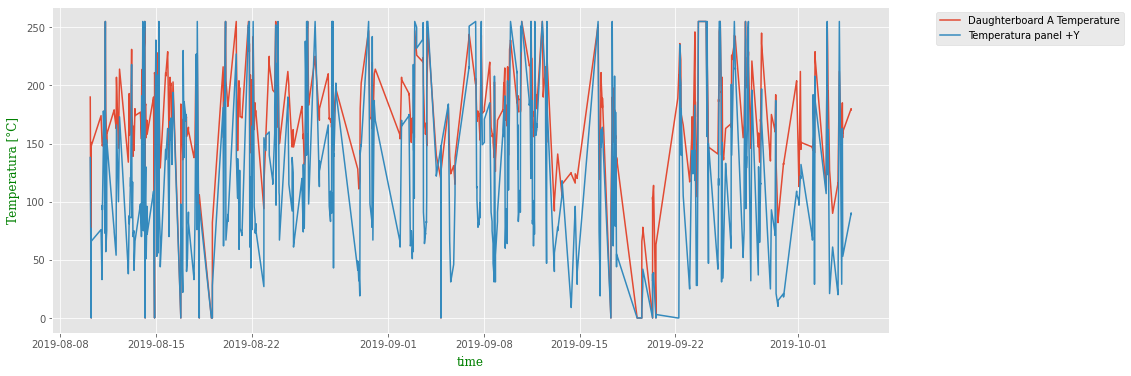

In [25]:
plt.figure(figsize=(15, 6))
plt.style.use('ggplot')
#plt.xlim('2019-08-08','2019-08-22')
plt.plot(Dataset['fields.daughter_atmp'], label='Daughterboard A Temperature')
plt.plot(Dataset['fields.py_tmp'], label='Temperatura panel +Y')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Temperatura [°C]", family='serif', color='g', weight='normal', size = 12, labelpad = 6)
plt.xlabel("time", family='serif', color='g', weight='normal', size = 12, labelpad = 6)
plt.show()